In [1]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# import our city_data into pandas 
city_data_df = pd.read_csv("Resources/city_data.csv")
#city_data_df.head()

In [3]:
# import our ride_data into pandas 
ride_data_df = pd.read_csv("Resources/ride_data.csv")
#ride_data_df.head()

In [4]:
# Merge the 2 dataframes using left join

city_and_data_df = pd.merge(city_data_df, ride_data_df,
                                 how='left', on='city')
city_and_data_df.head()

,city,driver_count,type,date,fare,ride_id
0,Kelseyland,63,Urban,2016-08-19 04:27:52,5.51,6246006544795
1,Kelseyland,63,Urban,2016-04-17 06:59:50,5.54,7466473222333
2,Kelseyland,63,Urban,2016-05-04 15:06:07,30.54,2140501382736
3,Kelseyland,63,Urban,2016-01-25 20:44:56,12.08,1896987891309
4,Kelseyland,63,Urban,2016-08-09 18:19:47,17.91,8784212854829


In [5]:
# This assignment looks at parameters PER CITY TYPE. 
# There are 3 city types: Urban, Suburban, Rural
# For each city type, do a .groupby["type"] for each paramater

# Define each type
urban_city_type = city_and_data_df[city_and_data_df["type"] == "Urban"]
suburban_city_type = city_and_data_df[city_and_data_df["type"] == "Suburban"]
rural_city_type = city_and_data_df[city_and_data_df["type"] == "Rural"]

# .groupby each parameter per city type
urban_ride_count = urban_city_type.groupby(["city"]).count()["ride_id"]
urban_avg_fare = urban_city_type.groupby(["city"]).mean()["fare"]
urban_driver_count = urban_city_type.groupby(["city"]).mean()["driver_count"]

suburban_ride_count = suburban_city_type.groupby(["city"]).count()["ride_id"]
suburban_avg_fare = suburban_city_type.groupby(["city"]).mean()["fare"]
suburban_driver_count = suburban_city_type.groupby(["city"]).mean()["driver_count"]

rural_ride_count = rural_city_type.groupby(["city"]).count()["ride_id"]
rural_avg_fare = rural_city_type.groupby(["city"]).mean()["fare"]
rural_driver_count = rural_city_type.groupby(["city"]).mean()["driver_count"]

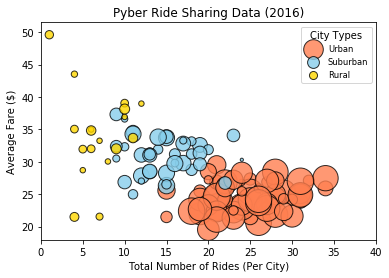

In [6]:
# Build the scatter plots for each city type: urban_ride = x-axis, urban_avg_fare = y-axis, 
#s=size of bubble, alpha = transparency of bubble. This will apply to the suburban and rural 
# city types
plt.scatter(x=urban_ride_count,
            y=urban_avg_fare,
            s=10*urban_driver_count, facecolors="coral",
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Urban")

plt.scatter(x=suburban_ride_count,
            y=suburban_avg_fare,
            s=10*suburban_driver_count, facecolors="skyblue",
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Suburban")

plt.scatter(x=rural_ride_count,
            y=rural_avg_fare,
            s=10*rural_driver_count, facecolors="gold",
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Rural")

# Scatter Properties 
plt.title("Pyber Ride Sharing Data (2016)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.xlim((0,40))


lgn = plt.legend(fontsize="small", mode="Expanded",
                numpoints=1, scatterpoints=1, loc="best", 
                title ="City Types",
                labelspacing =0.5) 

plt.show()



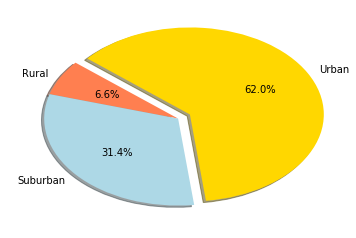

In [7]:
# % of TOTAL FARES BY CITY TYPE

# First, groupby each city type, then find the sum of each type, divde by sum of all fares
# for each type, then groupby the dataframe by type and perform the sum function in order to 
# divide the sum of fares for each type and divide the total fare of the dataframe
# This will apply to the other two pie charts


type_percents = 100 * city_and_data_df.groupby("type").sum()[["fare"]] / city_and_data_df["fare"].sum()
type_percents

# Create pie chart 
plt.pie(type_percents, explode=[0.0, 0.0, 0.1], labels=["Rural", "Suburban", "Urban"], colors=["Coral", "lightblue", "gold"],
        autopct="%1.1f%%", shadow=True, startangle=140)

#Show pie chart
plt.show()

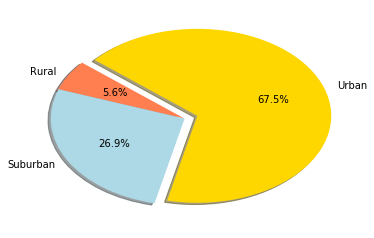

In [8]:
# % of Total Rides by City Type
type_percents = 100 * city_and_data_df.groupby("type").sum()[["ride_id"]] / city_and_data_df["ride_id"].sum()
type_percents

# Create pie chart
plt.pie(type_percents, explode=[0.0, 0.0, 0.1], labels=["Rural", "Suburban", "Urban"], colors=["Coral", "lightblue", "gold"],
        autopct="%1.1f%%", shadow=True, startangle=140)

#Show piechart
plt.show()

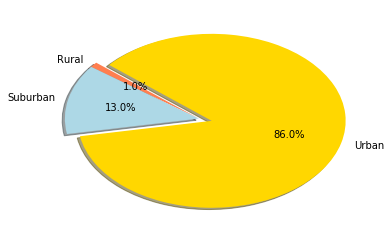

In [9]:
# % of Total Drivers by City Type
type_percents = 100 * city_and_data_df.groupby("type").sum()[["driver_count"]] / city_and_data_df["driver_count"].sum()
type_percents

# Create pie chart 
plt.pie(type_percents, explode=[0.0, 0.0, 0.1], labels=["Rural", "Suburban", "Urban"], colors=["Coral", "lightblue", "gold"],
        autopct="%1.1f%%", shadow=True, startangle=140)

#Show pie chart
plt.show()

TRENDS

1. Based on the data there were more ride sharing services in urban areas than in rural and 
suburban areas and that may have been due to the fact that the fares were a lot lower than in 
that area.

2. According to the data, rural areas tend to use ride sharing services a lot less than 
suburban and urban areas and it may be due to the high cost of fares or the fact that rural 
areas may have higher percentages of personal transportation which can correlate with those 
areas being in better financial standing hence, their own mode of transportation as opposed
to urban and suburban areas.

3. Total percentage of drivers in urban areas exceeds the amount of drivers in rural and 
suburban areas which comes to show the demand of ride sharing in urban areas therefore a 
great need for drivers. This can be due to the fact that in urban areas there is a lot more 
businesses and public locations where the opportunity for parking may be difficult hence a ride sharing service that can take one from point A to point B may be more convenient, manageable and cost effective.